In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [10]:
#step1: Use a BeautifulSoap 
#search for the three keywords: "ChatGPT", "Diffusion Models", "Reinforcement Learning" 
#download 50 articles title from the search result, via web scraping

def scrape_news(keyword, num_articles=50):
    titles, abstracts = [], []
    page_number = 0
    while len(titles) < num_articles:
        url = f"https://www.bing.com/news/search?q={keyword}&form=QBNH&first={page_number}"
        response = requests.get(url)
        if response.status_code != 200:
            break  # Stop if the response status code is not 200
        soup = BeautifulSoup(response.text, 'html.parser')
        news = soup.find_all('div', class_='t_s', limit=num_articles - len(titles))
        titles.extend([n.find('a', class_='title').text for n in news])
        abstracts.extend([n.find('div', class_='snippet').text for n in news])
        page_number += 10  # Next page parameter for Bing News
    return titles[:num_articles], abstracts[:num_articles]  # Ensure not to exceed 50 articles


keywords = ["ChatGPT", "Diffusion Models", "Reinforcement Learning"]

# Store results
keyword_frequencies = Counter()

# Scrape for each keyword
for keyword in keywords:
    titles, abstracts = scrape_news(keyword)

    #step2
    # Save to CSV
    df = pd.DataFrame({'Title': titles, 'Abstract': abstracts})
    file_name = f'{keyword}.csv'
    df.to_csv(file_name, index=False)

In [14]:
# Specify the file paths or names of your CSV files
file_paths = [
    'ChatGPT.csv',
    'Diffusion Models.csv',
    'Reinforcement Learning.csv'
]

# Loop through each file path and display its contents
for file_path in file_paths:
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Display the file path and the DataFrame's first few rows
        print(f"Contents of '{file_path}':")
        print(df)
        
        # Count and display the number of titles
        print(f"Number of titles in '{file_path}': {len(df['Title'])}\n")

    except Exception as e:
        # If there is an error, print the error message
        print(f"An error occurred while reading '{file_path}': {e}\n")


Contents of 'ChatGPT.csv':
                                                Title  \
0   ChatGPT in fight over where copyright claim su...   
1   Who has the best AI? Tech expert puts ChatGPT,...   
2              Here's How to Get Started With ChatGPT   
3   Hey ChatGPT, Why Isn’t My AI Fund Up Like Nvidia?   
4   OpenAI's Head of ChatGPT Says AI Will Make Us ...   
5   ChatGPT users to get access to news content fr...   
6   ChatGPT maker OpenAI lawyers up with familiar ...   
7     Elon Musk's Open-Source 'Grok' Takes on ChatGPT   
8   ChatGPT maker OpenAI lawyers up with familiar ...   
9              Here's How to Get Started With ChatGPT   
10  You can now add extra security to your ChatGPT...   
11  ChatGPT is probably using up more than half a ...   
12  It's not just Elon Musk: ChatGPT-maker OpenAI ...   
13  OpenAI says Musk agreed the ChatGPT maker shou...   
14  ChatGPT Stock Predictions: 3 Space Companies t...   
15    Elon Musk's Open-Source 'Grok' Takes on ChatGPT   
16  

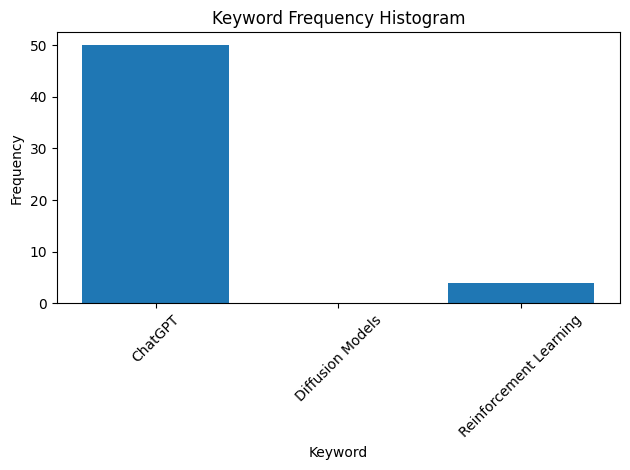

In [15]:
#step3
for keyword in keywords:
    titles, abstracts = scrape_news(keyword)
    
    # Calculate word frequency and update Counter
    all_titles_text = ' '.join(titles).lower()  # Convert to lowercase
    keyword_frequencies[keyword] += all_titles_text.count(keyword.lower())
    
plt.bar(keyword_frequencies.keys(), keyword_frequencies.values())
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Keyword Frequency Histogram')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()